In [168]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error 

In [169]:
# Load Dataset
df = pd.read_csv(r'Salary_Data.csv')

In [170]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [171]:
#Since the no of null values are low we can remove the rows with null values
df.dropna(inplace=True)

In [172]:
df['Job Title'].value_counts()

Job Title
Software Engineer                     518
Data Scientist                        453
Software Engineer Manager             376
Data Analyst                          363
Senior Project Engineer               318
                                     ... 
Junior Research Scientist               1
Senior Product Development Manager      1
Junior Social Media Specialist          1
Senior Software Architect               1
Social Media Man                        1
Name: count, Length: 191, dtype: int64

In [173]:
# Reducing Job titles by omitting titles with less than 25 counts

job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=30]
job_title_edited.count()

np.int64(143)

In [174]:
# Omitting titles with less than 25 counts

df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

49

In [175]:
#Checking unique value count of Education Level

df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [176]:
# Combining repeating values of education level

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [177]:
# Checking Unique Value count of Gender

df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

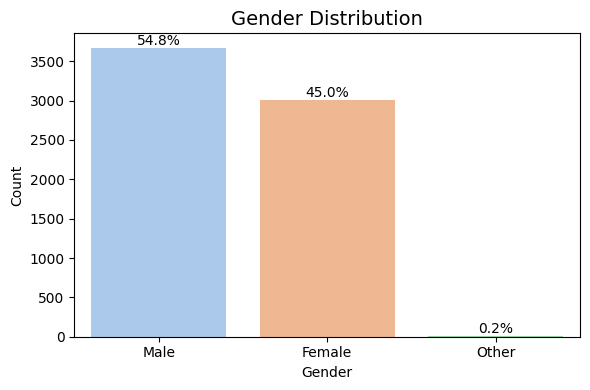

In [178]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel', order=df['Gender'].value_counts().index)

plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate percentages
total_gender = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.annotate(f'{(height/total_gender*100):.1f}%', 
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

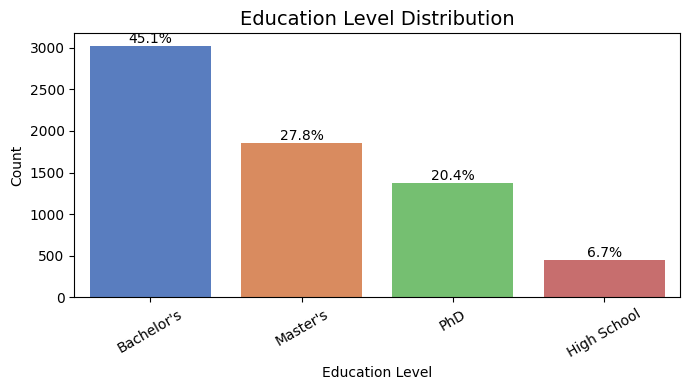

In [179]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Education Level', data=df, palette='muted', order=df['Education Level'].value_counts().index)

plt.title('Education Level Distribution', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=30)

# Annotate percentages
total_edu = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.annotate(f'{(height/total_edu*100):.1f}%', 
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

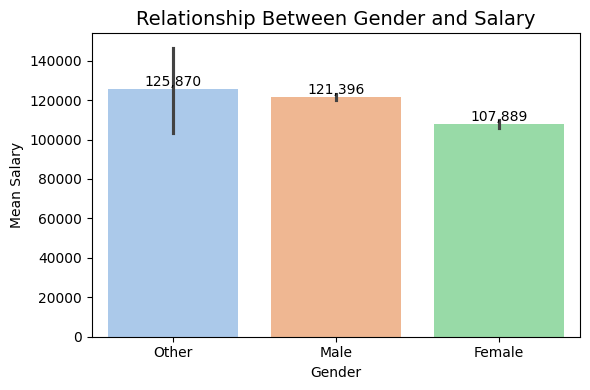

In [180]:
# Relationship Between Gender and Salary
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Salary', data=df, palette='pastel', order=df.groupby('Gender')['Salary'].mean().sort_values(ascending=False).index)

plt.title('Relationship Between Gender and Salary', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Mean Salary')

# Annotate mean salary values
for p in plt.gca().patches:
    height = p.get_height()
    plt.annotate(f'{height:,.0f}', 
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

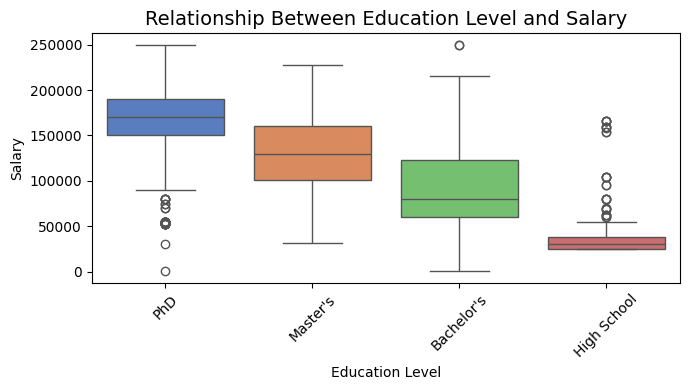

In [181]:
# Relationship Between Education Level and Salary

plt.figure(figsize=(7, 4))
sns.boxplot(x='Education Level', y='Salary', data=df, palette='muted',
            order=df.groupby('Education Level')['Salary'].median().sort_values(ascending=False).index)

plt.title('Relationship Between Education Level and Salary', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

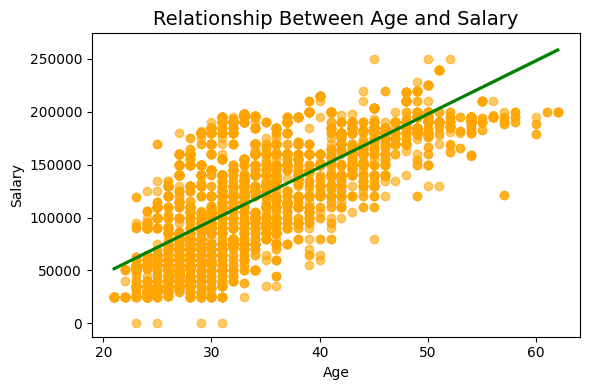

In [182]:
# Relationship Between Age and Salary

plt.figure(figsize=(6, 4))
sns.regplot(x='Age', y='Salary', data=df,
            scatter_kws={'color': 'orange', 'alpha': 0.6},
            line_kws={'color': 'green'})

plt.title('Relationship Between Age and Salary', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


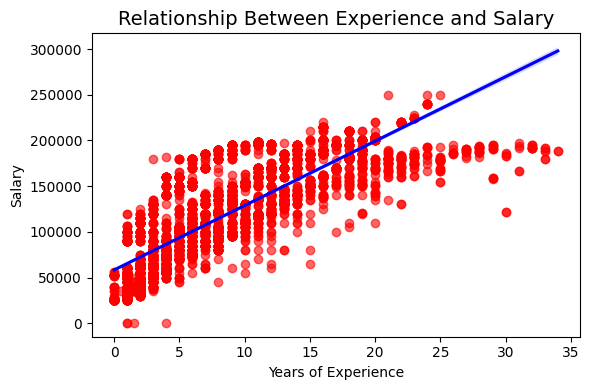

In [183]:
# Relationship Between Experience and Salary

plt.figure(figsize=(6, 4))
sns.regplot(x='Years of Experience', y='Salary', data=df,
            scatter_kws={'color': 'red', 'alpha': 0.6},
            line_kws={'color': 'blue'})

plt.title('Relationship Between Experience and Salary', fontsize=14)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [184]:


# Identify and encode all categorical columns automatically
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

print(" All categorical columns encoded successfully!")
print(df.head())

 All categorical columns encoded successfully!
    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0         46                  5.0   90000.0
1  28.0       0                2          2                  3.0   65000.0
2  45.0       1                3         27                 15.0  150000.0
3  36.0       0                0         33                  7.0   60000.0
4  52.0       1                2         27                 20.0  200000.0


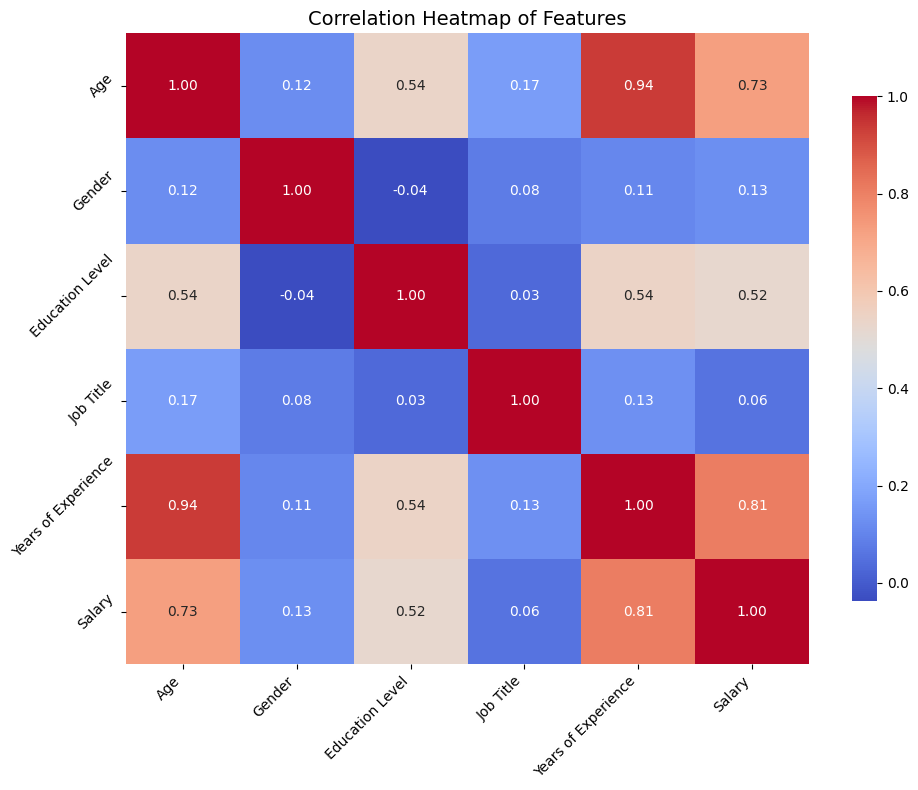

In [185]:
# Correlation Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap of Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Outlier Detection Completed
Lower Bound: -65000.00 | Upper Bound: 295000.00
Low Outliers: 0 | High Outliers: 0


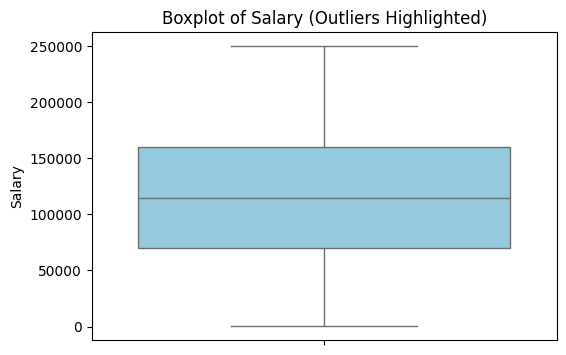

In [186]:
# Detecting Outliers in Salary Column (IQR Method)
# ---------------------------

Q1 = df['Salary'].quantile(0.25)  # First Quartile
Q3 = df['Salary'].quantile(0.75)  # Third Quartile
IQR = Q3 - Q1

# Define lower and upper bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify outliers
low_outliers = df[df['Salary'] < lower]
high_outliers = df[df['Salary'] > upper]

print(f"Outlier Detection Completed")
print(f"Lower Bound: {lower:.2f} | Upper Bound: {upper:.2f}")
print(f"Low Outliers: {len(low_outliers)} | High Outliers: {len(high_outliers)}")

plt.figure(figsize=(6, 4))
sns.boxplot(y='Salary', data=df, color='skyblue')
plt.title('Boxplot of Salary (Outliers Highlighted)')
plt.show()

In [187]:
# Create dummy variables (one-hot encoding)
job_dummies = pd.get_dummies(df['Job Title'], prefix='Job', drop_first=True)

# Concatenate with the main dataframe
df = pd.concat([df.drop('Job Title', axis=1), job_dummies], axis=1)

print(f"Dummy variables created successfully! Added {job_dummies.shape[1]} new columns.")
df.head()

# Define features and target
X = df.drop('Salary', axis=1)
y = df['Salary']

# 🔒 Save column names used in training (exclude target!)
import joblib
joblib.dump(X.columns.tolist(), "input_columns.pkl")
print("input_columns.pkl saved correctly!")


Dummy variables created successfully! Added 48 new columns.
input_columns.pkl saved correctly!


In [188]:
# Separating the Dataset into Features and Target

# Features (all independent variables)
X = df.drop('Salary', axis=1)

# Target (dependent variable to be predicted)
y = df['Salary']

print(f" Features and Target separated successfully!")
print(f"Feature Shape: {X.shape} | Target Shape: {y.shape}")
print("\nFeature Columns:\n", X.columns.tolist())

 Features and Target separated successfully!
Feature Shape: (6698, 52) | Target Shape: (6698,)

Feature Columns:
 ['Age', 'Gender', 'Education Level', 'Years of Experience', 'Job_1', 'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Job_8', 'Job_9', 'Job_10', 'Job_11', 'Job_12', 'Job_13', 'Job_14', 'Job_15', 'Job_16', 'Job_17', 'Job_18', 'Job_19', 'Job_20', 'Job_21', 'Job_22', 'Job_23', 'Job_24', 'Job_25', 'Job_26', 'Job_27', 'Job_28', 'Job_29', 'Job_30', 'Job_31', 'Job_32', 'Job_33', 'Job_34', 'Job_35', 'Job_36', 'Job_37', 'Job_38', 'Job_39', 'Job_40', 'Job_41', 'Job_42', 'Job_43', 'Job_44', 'Job_45', 'Job_46', 'Job_47', 'Job_48']


In [189]:


# Splitting Data into Training and Test Sets

# 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("✅ Data Split Completed!")
print(f"Training Set: {X_train.shape[0]} samples | Test Set: {X_test.shape[0]} samples")
print(f"Feature Count: {X_train.shape[1]}")

✅ Data Split Completed!
Training Set: 5023 samples | Test Set: 1675 samples
Feature Count: 52


In [190]:
model_params = {
    'Linear_Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision_Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [2, 4, 6, 8, 10],
            'random_state': [0, 42],
            'min_samples_split': [2, 5, 10, 20]
        }
    },
    'Random_Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'random_state': [42]
        }
    },
    'Gradient_Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5]
        }
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1, 10],
            'epsilon': [0.01, 0.1, 1]
        }
    },
    'Neural_Network': {
        'model': MLPRegressor(max_iter=500),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['relu', 'tanh'],
            'learning_rate_init': [0.001, 0.01]
        }
    }
}

In [191]:

import joblib

# ----------------------------------------
# Hyperparameter Tuning + Save Best Model
# ----------------------------------------

results = []
best_rmse_overall = float("inf")
best_model_name = None
best_model_final = None

for model_name, m in model_params.items():
    print(f"Tuning {model_name}...")

    clf = GridSearchCV(m['model'], m['params'],
                       cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    clf.fit(X_train, y_train)

    best_mse = -clf.best_score_
    best_rmse = np.sqrt(best_mse)
    train_r2 = clf.best_estimator_.score(X_train, y_train)

    results.append({
        'Model': model_name,
        'Best Params': clf.best_params_,
        'Best RMSE (Lower Better)': round(best_rmse, 2),
        'Train R2 Score': round(train_r2, 3)
    })

    # Save the best model
    if best_rmse < best_rmse_overall:
        best_rmse_overall = best_rmse
        best_model_name = model_name
        best_model_final = clf.best_estimator_

# Create DataFrame sorted by RMSE
results_df = pd.DataFrame(results).sort_values(by='Best RMSE (Lower Better)', ascending=True).reset_index(drop=True)
print("\n Model Comparison (sorted by Best RMSE):")
print(results_df)

# Save model and training columns
joblib.dump(model, "best_model.pkl")
joblib.dump(feature_columns, "feature_columns.pkl")

print(f"\nBest Model Saved: {best_model_name} | RMSE: {best_rmse_overall:.2f}")


Tuning Linear_Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuning Decision_Tree...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Tuning Random_Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tuning Gradient_Boosting...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tuning KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Tuning SVR...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Tuning Neural_Network...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/sadguru-sai/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sadguru-sai/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sadguru-sai/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sadguru-sai/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sadguru-sai/myenv/lib/pyth


 Model Comparison (sorted by Best RMSE):
               Model                                        Best Params  \
0      Random_Forest  {'max_depth': None, 'n_estimators': 200, 'rand...   
1                KNN          {'n_neighbors': 5, 'weights': 'distance'}   
2  Gradient_Boosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
3      Decision_Tree  {'max_depth': 10, 'min_samples_split': 2, 'ran...   
4  Linear_Regression                                                 {}   
5     Neural_Network  {'activation': 'relu', 'hidden_layer_sizes': (...   
6                SVR     {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}   

   Best RMSE (Lower Better)  Train R2 Score  
0                   8222.42           0.992  
1                   9637.75           0.993  
2                  10646.17           0.970  
3                  12325.07           0.964  
4                  21694.69           0.832  
5                  21905.45           0.830  
6                  30317.97        

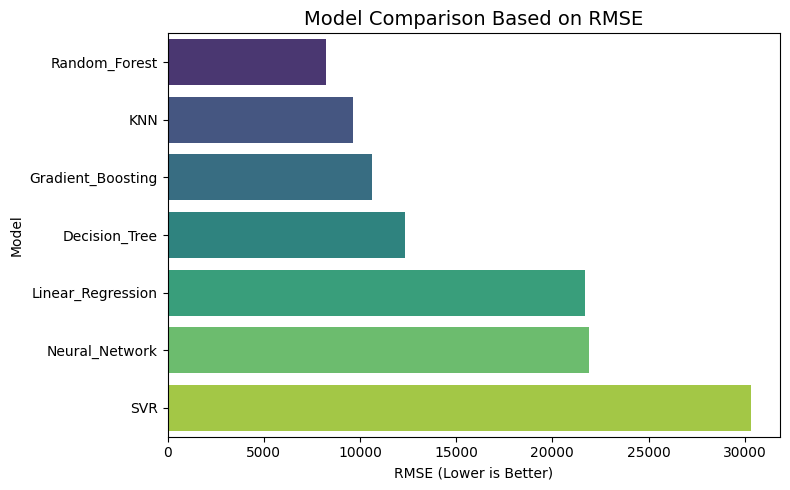

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Best RMSE (Lower Better)', y='Model', data=results_df, palette='viridis')
plt.title("Model Comparison Based on RMSE", fontsize=14)
plt.xlabel("RMSE (Lower is Better)")
plt.ylabel("Model")
plt.tight_layout()
plt.savefig("model_comparison_barplot.png")  # Save for PPT
plt.show()



In [193]:
import pandas as pd
import joblib

# -----------------------------
# Load model and feature columns
# -----------------------------
model = joblib.load("best_model.pkl")
input_columns = joblib.load("input_columns.pkl") 

# -----------------------------
# Define input
# -----------------------------
user_input = {
    'Company': 'Google',
    'Education Level': 'Bachelor',
    'Years of Experience': 3,
    'Location': 'Bangalore',
    'Job Title': 'Data Scientist',
    'Salary': 0 
}

# -----------------------------
# Convert to DataFrame
# -----------------------------
input_df = pd.DataFrame([user_input])

# Drop target variable if accidentally included
if 'Salary' in input_df.columns:
    input_df = input_df.drop('Salary', axis=1)

# -----------------------------
# One-hot encode and align columns
# -----------------------------
input_df = pd.get_dummies(input_df)

# Ensure all required columns are present
for col in input_columns:
    if col not in input_df.columns:
        input_df[col] = 0

# Ensure correct column order
input_df = input_df[input_columns]

# -----------------------------
# Predict
# -----------------------------
predicted_salary = model.predict(input_df)
print(f"Predicted Salary: ₹{predicted_salary[0]:,.2f}")


Predicted Salary: ₹65,879.53
